## Data Pre-processing section

In [47]:
## Importing the required libraries
import pandas as pd
import numpy as np
import keras

In [26]:
#Importing the dataset and creating the IV and DV
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values

In [27]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93826.6
4,850,Spain,Female,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0,2,1,0,96270.6
9996,516,France,Male,35,10,57369.6,1,1,1,101700
9997,709,France,Female,36,7,0,1,0,1,42085.6
9998,772,Germany,Male,42,3,75075.3,2,1,0,92888.5


### Handling categorical or text data

Dummy variable trap - Reference link: https://medium.com/datadriveninvestor/dummy-variable-trap-c6d4a387f10a
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Country column
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

# Male/Female
labelencoder_X = LabelEncoder()
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])

X = X[:, 1:] ## Removing one column to avoid dummy variable trap - remove one column from number of categorical values to remove collinearity.

In [29]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [30]:
pd.DataFrame(y).shape, pd.DataFrame(X).shape

((10000, 1), (10000, 11))

### Note:
Doing Feature scaling of columns before train test split. 
This will ensure that the mean and standard deviation for standard scaling (x-mean)/std.deviation is done based on entire dataset.
If the step is done after train test split, scaled values might differ


In [31]:
#Feature scalaing the columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [32]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

## Constructing the ANN

In [48]:
#Importing the appropriate classes from Keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
#Initializing the ANN
classifier = Sequential()

## Understanding of parameters
input_dim = number of variables in input layer - will be taken from dataset if not specified; only for first hidden layer

One Thumbrule (not strict): start with average number of inputs from input layer and output layer; in this case 11 (input columns) and 1 output column; number of nodes = (11 + 1)/2 = 6

Used sigmoid activation function as the probability of churn is helpful to make a decision

loss function - binary_crossentropy since the output variable is binary. if the output is categorical, loss function can be categorical_crossentropy

Reference: https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [49]:
#Adding layers to our ANN
classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu", input_dim = 11))

classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))

classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))

classifier.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
None


## Visualizing the model 

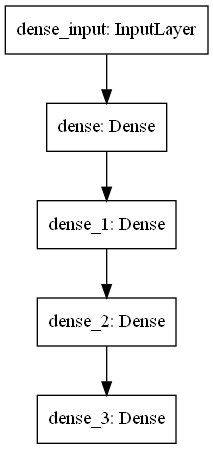

In [15]:
import graphviz, pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/' ## Install graphviz directly instead of pip
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file='model.png')

In [50]:
##Training the ANN
#Fitting the training-set into the ANN
#classifier.fit(X_train, y_train, batch_size = 32, epochs = 35)
## If the evaluation should be done with the test data at the end of each epoch, 
classifier.fit(X_train, y_train, batch_size = 32, epochs = 35, validation_data = (X_test, y_test))

Epoch 1/35
250/250 [==============================] - 2s 2ms/step - loss: 0.5613 - accuracy: 0.7852 - val_loss: 0.4840 - val_accuracy: 0.7975
Epoch 2/35
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8013 - val_loss: 0.4434 - val_accuracy: 0.7975
Epoch 3/35
250/250 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7874 - val_loss: 0.4381 - val_accuracy: 0.7975
Epoch 4/35
250/250 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7971 - val_loss: 0.4452 - val_accuracy: 0.7975
Epoch 5/35
250/250 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.7966 - val_loss: 0.4440 - val_accuracy: 0.7975
Epoch 6/35
250/250 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7975 - val_loss: 0.4460 - val_accuracy: 0.7975
Epoch 7/35
250/250 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7886 - val_loss: 0.4430 - val_accuracy: 0.7975
Epoch 

## Testing the ANN

In [38]:
#Predictions on the test-set
y_pred =  classifier.predict(X_test)
y_pred = (y_pred >=0.5)

In [39]:
#Calculating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
a = classifier.output_shape ## Number of nodes in output layer
b = classifier.input_shape ## number of nodes in input layer
c= classifier.optimizer
d = classifier.weights ## 6 weights for 11 nodes (11 X 6)

In [43]:
a, b, c, d

((None, 1),
 (None, 11),
 [<tf.Variable 'dense_4/kernel:0' shape=(11, 6) dtype=float32, numpy=
  array([[-8.3023019e-02, -6.9046967e-02, -5.5079643e-02, -1.7957720e-01,
          -7.0419624e-02, -1.0440028e-01],
         [-4.8916567e-02, -6.4819038e-02, -4.4164952e-02,  5.5968117e-02,
           5.1811155e-02, -4.3265242e-03],
         [ 6.7078364e-03,  4.1826829e-02,  2.1990856e-04, -3.2745846e-02,
           4.3472689e-02,  4.6416268e-02],
         [ 1.9802016e-03,  4.9690507e-02,  1.6197275e-02,  3.3250783e-02,
           4.3479200e-02,  3.9020702e-01],
         [-4.8531672e-01, -4.4098231e-01, -4.2284948e-01, -3.7379429e-01,
           3.5682580e-01, -2.6244268e-01],
         [ 3.4799952e-02, -5.4022908e-05,  3.2554492e-02, -5.6802709e-02,
           6.4404927e-02,  6.2776148e-02],
         [ 9.0347230e-03,  5.3980950e-02, -1.5459101e-02, -1.1896611e-01,
          -6.1676097e-03, -2.8685704e-01],
         [ 1.9684097e-02, -4.0545701e-03,  2.8420646e-02,  3.3610146e-02,
          -2

In [44]:
cm

array([[1556,   39],
       [ 282,  123]], dtype=int64)

In [45]:
precision = (1556 + 123)/2000
precision

0.8395

## Hyper Parameter Tuning using GridSearch

Reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/